#**Project Name - Credit Card Fraud Detection**

#**Project Summary**

The aim of the project is to predict fraudulent credit card transactions using machine learning models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.

#**Introduction**

In this project the dataset used containing information about credit card transactions, and experiment with algorithms like Logistic Regression, Decision Trees,or Random Forests to classify transactions as fraudulent or legitimate.
Steps:
1. Merge both train and test.
2. Look into each of the columns.
3. Split data into train and test.
4. Model building and evaluation.



#**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')



#**Dataset Loading**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path ='/content/drive/MyDrive/Credit_card/'

In [ ]:
df=pd.read_csv(path+'fraudTrain.csv',encoding='unicode_escape')
test_df=pd.read_csv(path+'fraudTest.csv',encoding='unicode_escape')

#**Exploratory Data Analysis**

In [ ]:
# Concat the data
df1= pd.concat([df,test_df])

In [ ]:
# Dataset first look
df1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df1.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [ ]:
df1.shape

(1852394, 23)

In [ ]:
# Dataset info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

In [ ]:
# Duplicate value count
len(df1[df1.duplicated()])

0

In [ ]:
# Dataset Columns
df1.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
# Dataset Describe
df1.describe(include="all")

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1852394,1.852394e+06,1852394,1852394,1.852394e+06,1852394,1852394,1852394,1852394,...,1.852394e+06,1.852394e+06,1.852394e+06,1852394,1852394,1852394,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
unique,NaN,1819551,NaN,693,14,NaN,355,486,2,999,...,NaN,NaN,NaN,497,984,1852394,NaN,NaN,NaN,NaN
top,NaN,2019-04-22 16:02:01,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,...,NaN,NaN,NaN,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,6262,188029,NaN,38112,40940,1014749,4392,...,NaN,NaN,NaN,13898,8044,1,NaN,NaN,NaN,NaN
mean,5.371934e+05,NaN,4.173860e+17,NaN,NaN,7.006357e+01,NaN,NaN,NaN,NaN,...,3.853931e+01,-9.022783e+01,8.864367e+04,NaN,NaN,NaN,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,NaN,1.309115e+18,NaN,NaN,1.592540e+02,NaN,NaN,NaN,NaN,...,5.071470e+00,1.374789e+01,3.014876e+05,NaN,NaN,NaN,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,NaN,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,...,2.002710e+01,-1.656723e+02,2.300000e+01,NaN,NaN,NaN,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,NaN,1.800429e+14,NaN,NaN,9.640000e+00,NaN,NaN,NaN,NaN,...,3.466890e+01,-9.679800e+01,7.410000e+02,NaN,NaN,NaN,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,NaN,3.521417e+15,NaN,NaN,4.745000e+01,NaN,NaN,NaN,NaN,...,3.935430e+01,-8.747690e+01,2.443000e+03,NaN,NaN,NaN,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,NaN,4.642255e+15,NaN,NaN,8.310000e+01,NaN,NaN,NaN,NaN,...,4.194040e+01,-8.015800e+01,2.032800e+04,NaN,NaN,NaN,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00


In [ ]:
# Drop the value
df1 = df1.drop('Unnamed: 0', axis = 1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

In [ ]:
# Null value
df1.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

We can see that there is no missing values in any of the columns. Hence, there is no problem with null values in the entire dataset.


In [ ]:
# Plot graph
fraud_counts = df1['is_fraud'].value_counts()

fig = px.pie(names=fraud_counts.index, values=fraud_counts.values, title='Fraudulent Transactions Distribution')

fig.show()

In [ ]:
#Label Encoder
le = LabelEncoder()
for column in df1.columns:
    if df1[column].dtype == 'object':
        df1[column] = le.fit_transform(df1[column])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  int64  
 1   cc_num                 int64  
 2   merchant               int64  
 3   category               int64  
 4   amt                    float64
 5   first                  int64  
 6   last                   int64  
 7   gender                 int64  
 8   street                 int64  
 9   city                   int64  
 10  state                  int64  
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    int64  
 16  dob                    int64  
 17  trans_num              int64  
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

In [ ]:
x = df1.drop(columns=['is_fraud'])
y = df1['is_fraud']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = DecisionTreeClassifier()

In [ ]:
columns = ['LogisticRegression', 'RandomForestClassifier' , 'DecisionTreeClassifier']
accuracies=[]

In [ ]:
def cal (model):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)

    accuracies.append(accuracy)

    print("-----Model Evaluation on Test Data-----")
    print(model)
    print()
    print(accuracy)

In [ ]:
#LogisticRegression
cal(model1)

-----Model Evaluation on Test Data-----
LogisticRegression()

0.9947284461467452


In [ ]:
#DecisionTreeClassifier
cal(model3)

-----Model Evaluation on Test Data-----
DecisionTreeClassifier()

0.996488329972819


In [ ]:
#RandomForestClassifier
cal(model2)

-----Model Evaluation on Test Data-----
RandomForestClassifier()

0.9978244380923075


In [ ]:
accuracies

[0.9947284461467452, 0.996488329972819, 0.9978244380923075]

In [ ]:
FinalResult=pd.DataFrame({'Algorithm':columns, 'Accuracy':accuracies})

In [ ]:
FinalResult

,Algorithm,Accuracy
0,LogisticRegression,0.994728
1,RandomForestClassifier,0.996488
2,DecisionTreeClassifier,0.997824


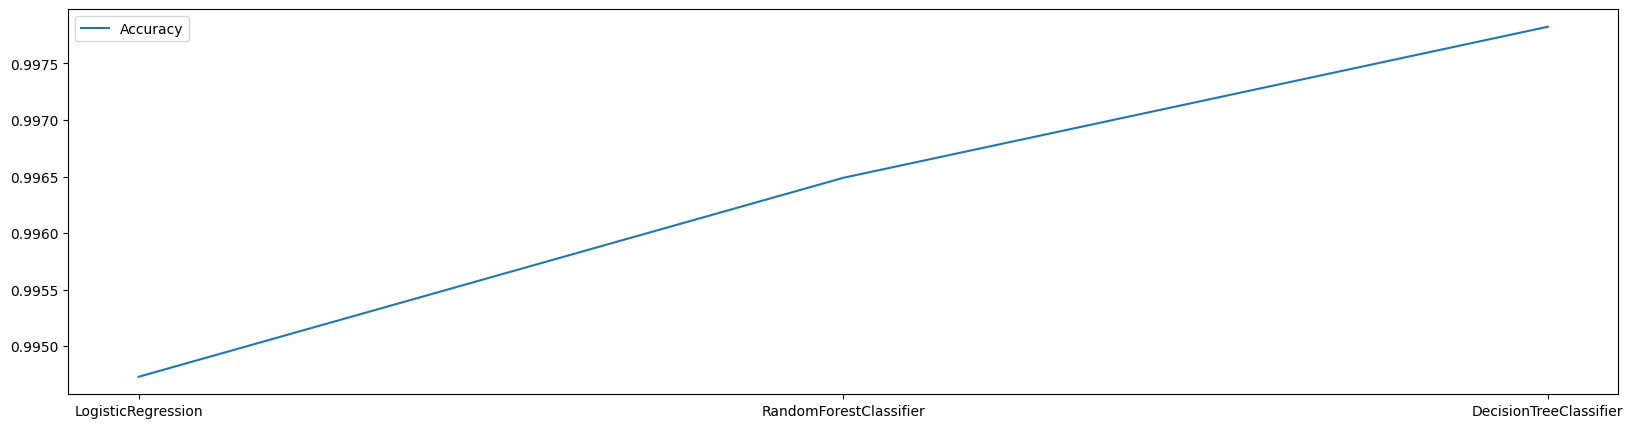

In [ ]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(FinalResult.Algorithm,accuracies,label="Accuracy")
plt.legend()
plt.show()

In [ ]:
x_test = df1.drop(columns=["is_fraud"], inplace = False)
y_test = df1["is_fraud"]

In [ ]:
#RandomForestClassifier
y_pred = model2.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy = accuracy_score(df1['is_fraud'],y_pred)
accuracy

0.9995616483318344